# Ch. 7 - Initial and Boundary Value Problems of Differential Equations

## Section 7.1 - Initial Value Problems: Euler, Runge_Kutta and Adams Methods

Let's start with a basic and essential problem: computing an approximate solution of an ordinary differential equation (__ODE__) with a specified initial value:

$$\frac{dy}{dt} = f(t,y)\;, \qquad y(0) = y_0$$

You have likely seen the classic way of computing an approximate solution: __Euler's method__

This is a classic "stepping" or "marching" method that computes a sequence of values at discrete "future" times based on the existing "history": $$y_n = y(t_n) ; \; t_n = t_0 + n \Delta t = t_0 + n h$$

1) Approximate the derivative with a simple forward difference estimator

$$\frac{dy}{dt} = f(t,y)\;, \qquad y(0) = y_0 \rightarrow \frac{y_{n+1} - y_n}{h}\approx f(t_n, y_n)$$

2) Knowing $y_n$ and $t_n$, compute $y_{n+1}$:
$$y_{n+1} = y_n + h f(t_n, y_n)$$



Euler's method essentially computes the rate of change at the beginning of a time step (from $t_n$ to $t_{n+1}$) and ignores the change in that rate of change over short time steps. This assumption is, of course, not completely valid so truncation error is incurred.

There are numerous generalizations of Euler's method of the form $$y_{n+1} = y_n + h \phi$$ where the function $\phi$ is chosen to reduce the error incurred during the timestep. For example, the Euler formula can be used to estimate future values and the estimated derivatives at those times can be used to account for how the rate of change varies across the timestep.

__Heun's method__: 

1) Compute the right-hand side (RHS) at initial time (left end of the timestep).

2) Compute Euler estimate of $y_{t+h}$

3) Use Euler estimate to compute estimate of derivative at final time (right end of the timestep)

4) Use the average of the derivatie estimates from left and right ends

Euler: $$y_{n+1} = y_n + h f(t_n, y_n)$$

$$y_{Euler} = y(t) + h f(t,f(t,y(t))$$

$$y(t+h) = y(t) + \frac{h}{2} \big( f(t,y(t)) + f(t+h,y_{Euler}) \big); \qquad \mathrm{Eq. (7.1.13a)}$$

__Modified Euler-Cauchy__:

1) Compute derivate (RHS) at initial time (left side of interval)

2) Use that derivative value to compute "Euler" estimate of derivative at middle of interval.

3) Use mid-interval value to estimate rate of change over the interval.

$$rate_{left} = f(t, y(t))$$
$$y_{mid} = y(t) + \frac{h}{2} rate_{left}$$
$$rate_{mid} = f(t+\frac{h}{2}, y_{mid})$$
$$y_{RK2}(t+h) = y(t) + h (rate_{mid})$$

Put the pieces together:
$$y_{RK2}(t+h) = y(t)+h f\big(t+\frac{h}{2}, y(t)+\frac{h}{2} \; f(t,y(t)) \big); \qquad \mathrm{Eq. 7.1.13b}$$

If that is the modified Euler-Cauchy method, why is the subscript "RK2"?

Euler's method and the modified Euler-Cauchy method are actually the first 2 methods in the family of __Runge-Kutta methods__ that aim to reduce the truncation error (i.e. increase the order by making the neglected terms involve higher powers of $h$) by including rate estimates at additional points in the timestep.

Perhaps the most commonly used member of the family is __Fourth-Order Runge_Kutta (RK4)__:

1) Compute initial rate estimate
$$f_1 = f(t_n,y_n)$$

2) Use initial rate estimate to estimate midstep values
$$f_2 = f(t_n+\frac{h}{2}, y_n+\frac{h}{2}f_1)$$

3) Use the midstep estimate to compute improved midstep estimate
$$f_3 = f(t_n+\frac{h}{2}, y_n+\frac{h}{2}f_2)$$

4) Use improved midstep estimate to estimate right-side estimate
$$f_4 = f(t_n+h,y_n+h f_3)$$

5) Compute weighted sum  of contributions to cancel terms in the Taylor series. <br>Achieve local truncation error $\sim O(h^5) \implies$ global error $\sim O(h^4)$:
$$y_{n+1} = y_n + \frac{h}{6} [f_1 + 2 f_2 +2 f_3 + f_4]$$

We will return to take a closer look at error analysis, but for now let's pause to think about what is nice about Runge-Kutta methods:

Do you need previous values of $y$ (before $y_n$) to compute $y_{n+1}$?

__No__, so when you are given $y_0$ and $f(t,y)$ you have everything needed to compute $y_{n+1} \iff$ __self-starting__

Computing the RK4 estimate involves computing everythign we need for the lower order RK2 estimate. What could we do with such information?

Estimate local error $\implies$ possible to implement automated adaptive stepsize control.

### Adams method: Multi-stepping techniques

What we were really doing above is approximating the fundamental theorem of calculus (that a function is the integral of its derivative):
$$y_{n+1} = y_n + \int_{t_n}^{t_n + h} f(t,y) dt$$

For Runge-Kutta, we estimated the interval based on information at $t_n$. Adams methods take an alternative approach:

Use previous values to construct a locally valid polynomial approximant $p(t,y)$ and integrate the polynomial:
$$y_{n+1} = y_n + \int_{t_n}^{t_n + h} p(t,y) dt$$

__Adams-Bashforth methods__ construct the polynomial based on the current point and $n$ previous points.

The first member of the family with $n=0$ uses an order 0 polynomial:
$$p_1(t) = \mathrm{constant} = f(t_n, y_n)$$
leading to
$$y_{n+1} = y_n + h f(t_n,y_n)$$
which should look familiar (because it is Euler's method).

__Note on notation__: The convention followed in the book is that the subscript on the polynomial indicates the number of points used, so it is one greater than the degree of the polynomial.

We start to get something new when we use 2 points, $y_{n-1}, y_n$, and a polynomial of degree 1:
$$p_2 = f_{n-1}+\frac{f_n-f_{n-1}}{h}(t-t_{n-1})$$
$$y_{n+1}=y_n + \int_{t_n}^{t_n + h} p(t,y) dt$$
$$y_{n+1}=y_n + \int_{t_n}^{t_n + h} \big( f_{n-1}+\frac{f_n-f_{n-1}}{h}(t-t_{n-1})\big) dt$$
$$y_{n+1}=y_n + \frac{h}{2} \big[ 3 f(t_n,y_n) - f(t_{n-1},y_{n-1}) \big]; \qquad \mathrm{Eq.(7.1.23)}$$
This is a _two-step method_:
Need $y_{n-1}$ and $y_n$ to compute $y_{n+1}$, so NOT self-starting.
<br>Consider initial state: given $y_0$ not enough into to compute $y_1$
<br>Need __bootstrapping__ technique to get started



Let's look at implementations of these basic methods:

### Euler's method (START HERE Tuesday 1/28/20)

Let's start with a familiar initial value problem:
$$\frac{dy}{dt}=-y\; ; \qquad y(0) = 1$$

In [2]:
import numpy as np

# define "right-hand side" function giving rate of change
#
def rhs(y,t):
    """
    compute right-hand side function specifying rate of change
    
    Args:
        t: float value of independent variable
        y: float value of dependent variable
        
    Returns:
        rate: float value for rate of change of y
    """
    rate = -y
    return rate

Now implement a function to take a single step:

In [3]:
def euler_step(f,y,t0,t1):
    """
    compute next value for Euler's method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h = (t1-t0)
    y_new = y + h*f0
    return y_new

In [4]:
euler_step(rhs,1,0,.1)

0.9

Construct a multistep Euler solver that can be used for longer intervals:

In [5]:
def euler_solve(f,y0,t):
    """
    Euler ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: float initial value of dependent variable
        t: numpy array of float values of independent variable
        
    Returns:
        y: numpy array of float values of dependent variable
    """
    n = t.size
    y = [y0] #create solution as a list (of 1D numpy arrays) to which additional array values can be appended
    for i in range(n-1):
        y.append(euler_step(f,y[i],t[i],t[i+1])) #append new value to the list
    return np.array(y) #return the solution coverted to a numpy array

In [6]:
steps = 4
t = np.linspace(0,1,steps+1)
y = euler_solve(rhs,1,t)
print(t)
print(y)

[0.   0.25 0.5  0.75 1.  ]
[1.         0.75       0.5625     0.421875   0.31640625]


Compute values of exact solution $y(t)=exp(-t)$ for comparison:

In [7]:
n = t.size
y_exact = np.zeros(n)
for i in range(n):
    y_exact[i] = np.e**(-t[i])

error = (y_exact - y)
rel_error = (y_exact - y)/y_exact
print(error)
print(rel_error)

[0.         0.02880078 0.04403066 0.05049155 0.05147319]
[0.         0.03698094 0.07259429 0.10689062 0.13991864]


Plot and compare exact solution and approximate solution by Euler's method:

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib's pyplot function under the abbreviation plt

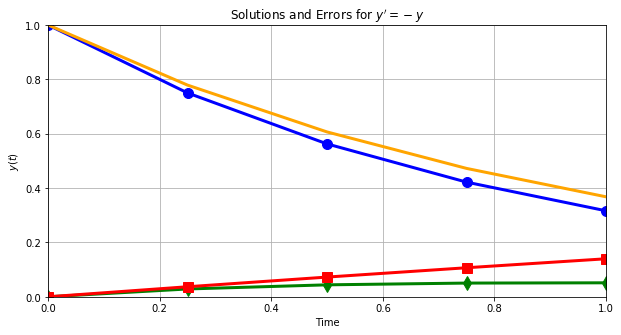

In [167]:
#################################################
#TRICK FOR CONTROLLING SIZE OF PLOTS IN NOTEBOOK#
fig=plt.figure(figsize=(10,5))                  #
#################################################

plt.plot(t,y, color='blue', marker='o', linestyle='solid', linewidth=3, markersize=10) 
plt.plot(t,y_exact, color='orange', marker='', linestyle='solid', linewidth=3, markersize=10)
plt.plot(t,error, color='green', marker='d', linestyle='solid', linewidth=3, markersize=10)
plt.plot(t,rel_error, color='red', marker='s', linestyle='solid', linewidth=3, markersize=10)
plt.axis([0,1,0,1])
plt.title("Solutions and Errors for $y' = -y$")
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.grid(True)
# plt.savefig("figure.png") #save the plot to a file
plt.show()

In this case, the $\color{blue}{approximate~solution}$ tracks the $\color{orange}{exact~solution}$ reasonably well. The $\color{green}{absolute~error}$ appears to accumulate initially, and then level off; but this is largely because the exact solution decays exponentially. The $\color{red}{relative~error}$ a grows steadily during the simulation.

Naturally we want to explore how the errors depend on number/size of steps, so compute the error in $y(1)$ for a range of step counts, print, plot, and interpret.

Before doing so, take a moment to think about what kind of results you expect to see. Make some concrete predictions, then proceed.

In [127]:
from timeit import default_timer as timer

m = 8
y1_exact = 1/np.e
steps =  np.zeros(m, dtype=np.int64)
y1 = np.zeros(m)
abs_error = np.zeros(m)
rel_error = np.zeros(m)
timings = np.zeros(m)

for i in range(m):
    steps[i] = 10**i
    t = np.linspace(0,1,steps[i]+1)
    y = np.zeros(steps[i]+1)
    start = timer()
    y1[i] = euler_solve(rhs,1,t)[-1] #take the last entry from the solver corr. to t=1
    end = timer()
    timings[i] = end-start
abs_error = np.abs(y1 - y1_exact)
rel_error = abs_error/y1_exact

np.set_printoptions(precision=2) #set printed output to show 2 digits to right of decimal point
print("Steps:\n", 1.* steps)
print("Relative errors:\n", rel_error)
print("Runtime:\n", timings)

Steps:
 [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]
Relative errors:
 [1.00e+00 5.22e-02 5.02e-03 5.00e-04 5.00e-05 5.00e-06 5.00e-07 5.00e-08]
Runtime:
 [1.32e-05 1.24e-05 8.34e-05 8.69e-04 1.08e-02 1.24e-01 8.91e-01 8.46e+00]


The behavior here is clear enough that we can see it without plotting:

Reducing the stepsize (increasing the number of steps) by a factor of 10 decreases the relative error by a factor of 10 throughout the range `1e0` to `1e-8`.

Conclusions:

1) The method has global truncation $\sim O(h^1) \iff $ local truncation error $\sim O(h^2)$.

2) Truncation error dominates throughout the range of stepsizes explored.

3) As `h` becomes smaller, the runtimes become longer (because number of steps $\sim \frac{1}{h}$)..

At smaller stepsizes, we expect to see a minimum error followed by growing dominance of roundoff error. However, the runtimes are becoming intolerable before we get to the minimum error which suggests using alternate methods with higher order accuracy.

But before we move on, let's consider what happens if there is a general multiplicative constant on the right-hand side:
$$\frac{dy}{dt} = -y \qquad \rightarrow \qquad \frac{dy}{dt} = \lambda y$$

We just looked at the case where $\lambda = -1$. Now let's think about other cases:

* $\lambda>0$: What happens in this case?

Exponential growth ensues. The exact solution diverges toward $\infty$. Likewise small initial errors grow large with time...

* Perhaps the more interesting case involves $\lambda < -1$. The exact solution simply decays toward zero faster than before, so what could be the problem with that? Let's construct someother cases and take a look.

We could created a modified version of `rhs` that would take an additional argument, but instead let's introduce a useful python notation for defining short, anonymous functions which, naturally, causes a classic notation collision:

__Python lambda functions__:
The general form is:
`lambda arg1, arg2, ..., argN : expression`

In this case, our expression is going to inolve the constant that is called $\lambda$ in the book, but these are two unrelated things for which the same name has been used:

* `lamdba` is a python keyword for creating one-line anonymous functions

* $\lambda$ is the constant multiplier in the example ODE $y' = -\lambda y$.

With that detail behind us, let's construct an example lambda function and then use lambda functions to conventiently define new right-hand sides for our ODE.

In [157]:
(lambda x : x**2)(4) #anonymous version

16

In [285]:
sq = lambda x : x**2 #can also assign a name to enable reuse
sq(4)

16

In [286]:
#create RHS for coefficients -1, -15, -20, -25
rhs01 = lambda y, t : -y
rhs15 = lambda y, t : -15*y
rhs20 = lambda y, t : -20*y
rhs25 = lambda y, t : -25*y

In [287]:
#Solve the ODE with each RHS using 10 steps on [0,1]
steps = 10
t = np.linspace(0,1,steps+1)
y01 = euler_solve(rhs01,1,t)
y15 = euler_solve(rhs15,1,t)
y20 = euler_solve(rhs20,1,t)
y25 = euler_solve(rhs25,1,t)

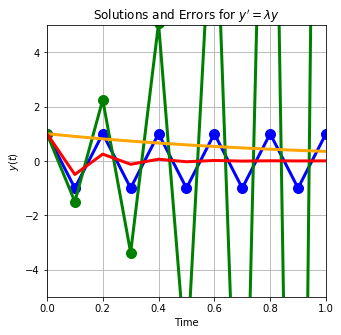

In [288]:
# plot the 10 step Euler solutions
plt.plot(t,y20, color='blue', marker='o', linestyle='solid', linewidth=3, markersize=10) 
plt.plot(t,y25, color='green', marker='o', linestyle='solid', linewidth=3, markersize=10) 
plt.plot(t,y01, color='orange', marker='', linestyle='solid', linewidth=3, markersize=10)
plt.plot(t,y15, color='red', marker='', linestyle='solid', linewidth=3, markersize=10)
plt.axis([0,1,-5,5])
plt.title("Solutions and Errors for $y' = \lambda y$")
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.grid(True)
plt.rcParams["figure.figsize"] = [5,5]
# plt.savefig("figure.png") #save the plot to a file
plt.show()

* $\color{orange}{\lambda = -1}$ (the solution obtained previously): Euler solution tracks the exact solution and decays toward zero. 

* $\color{red}{\lambda = -15}$: Euler solution has oscillations that are not present in the exact solution.

* $\color{blue}{\lambda = -20}$: Euler solution oscillates without decaying.

* $\color{green}{\lambda = -25}$: Euler not only oscillations, but also diverges (as the solution grows toward $\infty$). 

The relevant issue here is not accuracy but __stability__. For values of $\lambda$ that are sufficiently negative, solutions exhibit spurious oscillatory behavior ($\lambda < -10$) and eventually diverge ($\lambda < -20$ or $\lambda > 0$). 

Note that this behavior depends on the stepsize: Even for $\lambda= - 25$, both divergence and oscillation are avoided for with a sufficient number of steps (sufficiently small stepsize).


In [289]:
#Solve the ODE with each RHS using 50 steps on [0,1]
steps = 50
t = np.linspace(0,1,steps+1)

y25_50steps = euler_solve(rhs25,1,t)
print(y25_50steps)

[1.00e+00 5.00e-01 2.50e-01 1.25e-01 6.25e-02 3.12e-02 1.56e-02 7.81e-03
 3.91e-03 1.95e-03 9.77e-04 4.88e-04 2.44e-04 1.22e-04 6.10e-05 3.05e-05
 1.53e-05 7.63e-06 3.81e-06 1.91e-06 9.54e-07 4.77e-07 2.38e-07 1.19e-07
 5.96e-08 2.98e-08 1.49e-08 7.45e-09 3.73e-09 1.86e-09 9.31e-10 4.66e-10
 2.33e-10 1.16e-10 5.82e-11 2.91e-11 1.46e-11 7.28e-12 3.64e-12 1.82e-12
 9.09e-13 4.55e-13 2.27e-13 1.14e-13 5.68e-14 2.84e-14 1.42e-14 7.11e-15
 3.55e-15 1.78e-15 8.88e-16]


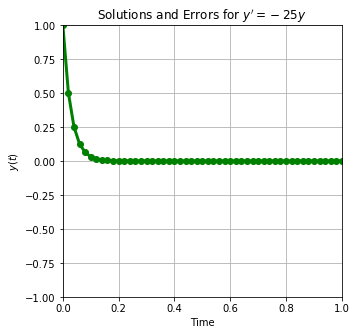

In [290]:
# plot the 50 step Euler solution
 
plt.plot(t,y25_50steps, color='green', marker='o', linestyle='solid', linewidth=3, markersize=6) 
plt.axis([0,1,-1,1])
plt.title("Solutions and Errors for $y' = -25 y$")
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.grid(True)
# plt.savefig("figure.png") #save the plot to a file
plt.show()

Before getting into the details of convergence and stability analysis, let's expand the problem scope and explore some of the other numerical solution methods.

### Systems of first order ODEs

So far we have considered examples where the dependent variable $y$ is a scalar function of the independent variable $t$. 

* What happens if we introduce additional __independent variables__?
<br><br><br><br><br><br><br>
That puts into a significantly different world of __partial differential equations (PDEs)__; and we will get tehre soon enough, but not yet.

* What happens if we introduce additional __dependent variables__?
<br><br><br><br><br><br><br>
That is not a big deal: just consider the dependent variable to be a vector quantity $\boldsymbol{y}$.
$$\frac{d \boldsymbol{y}}{dt} = f(\boldsymbol{y}, t)$$

The relevant example in the text is given by Eq. (7.1.33) adjusted for python indexing:

\begin{equation} \label{eq1}
\begin{split}
\frac{d y_0}{dt} & = y_1 \\
\frac{d y_1}{dt} & = y_2 \\
\frac{d y_2}{dt} & = -y_2^2 y_1 -cos(t) y_0 + g(t)
\end{split}
\end{equation}

We can just consider $\boldsymbol{y} = (y_0, y_1, y_2)^T$ and write the system as a vector ODE:
$$\frac{d \boldsymbol{y}}{dt} = \frac{d}{dt} \begin{pmatrix} y_0\\y_1\\y_2 \end{pmatrix}   = \begin{pmatrix} y_1\\y_2\\-y_0^2 y_1 -cos(t) y_0 + g(t) \end{pmatrix} = f(\boldsymbol{y}, t)$$

In [10]:
# define "array right-hand side" function giving rate of change for Eq.(7.1.32) 
# with g(t) = sin(t)

def arr_rhs(y,t):
    """
    compute right-hand side function specifying rate of change
    
    Args:
        t: float value of independent variable
        y: numpy array of 3 floats storing value of dependent variable
        
    Returns:
        rate: numpy array of 3 floats value for rate of change of y
    """
    rate = np.array([y[1],y[2],-y[0]**2 *y[1]-np.cos(t)*y[0]+np.sin(t)])
    return rate

So it is pretty straightforward to define a rate vector, and we can put it work after creating a numpy array of 3 initial values:

In [11]:
y0 = np.array([1,0,0]) #set an array of initial values
arr_rhs(y0,0) #compute the initial rate array

array([ 0.,  0., -1.])

Now that we are computing the numpy array for the rates of change, let's see if our previous `euler_step` function is compatibly computes an updated array of values:

In [12]:
euler_step(arr_rhs, y0, 0, 0.1)

array([ 1. ,  0. , -0.1])

That looks promising, so let's move on to try `euler_solve`:

In [13]:
steps = 10
y0 = np.array([1,0,0])
t = np.linspace(0,1,steps+1)
y = euler_solve(arr_rhs, y0, t)
print(t)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[ 1.          0.          0.        ]
 [ 1.          0.         -0.1       ]
 [ 1.         -0.01       -0.18951707]
 [ 0.999      -0.02895171 -0.2666568 ]
 [ 0.99610483 -0.05561739 -0.32965351]
 [ 0.99054309 -0.08858274 -0.37694051]
 [ 0.98168482 -0.12627679 -0.40723477]
 [ 0.96905714 -0.16700027 -0.41962311]
 [ 0.95235711 -0.20896258 -0.41363639]
 [ 0.93146085 -0.25032622 -0.38929957]
 [ 0.90642823 -0.28925617 -0.34714863]]


That provides a working ODE solver for first-order systems, and we are ready for the next topic:

### Higher Order ODEs

What if you are faced with a seond-order or third-order ODE? Do you need to do anything special?<br><br><br><br><br><br><br>

Not really; for an equation of degree $n$ just introduce an array of $n$ variables $y[0], y[1], \ldots, y[n-1]$ corresponding to the variable, and it's first $n-1$ derivatives. This produces a system of $n$ first-order equations where the first $n-1$ equations define the variables (e.g. $\frac{d y_0}{dt} = y_1$) and the $n^{th}$ equations describes the given $n^{th}$ order ODE in terms of the new variables.

To be concrete, the linear system from Eq.(7.1.33) is derived in exactly this way from the $3^{rd}$ order ODE:
$$\frac{d^3 u}{dt^3}+u^2 \frac{du}{dt}+ cos(t) u = g(t) \; \qquad \mathrm{Eq.(7.1.30)}$$

### Implement other methods: RK2

The cell below contains the `euler_step` function creation above. 

In [314]:
def euler_step(f,y,t0,t1):
    """
    compute next value for Euler's method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h = t1-t0
    y_new = y + h*f0
    return y_new

Here the function is modified to create a step using a __Second-order Runge-Kutta (RK2)__ method: $$y_{RK2}(t+h) = y(t)+h f\big(t+\frac{h}{2}, y(t)+\frac{h}{2} \; f(t,y(t)) \big)$$

In [14]:
def rk2_step(f,y,t0,t1):
    """
    compute next value for Euler's method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h  = t1-t0
    
    #compute euler estimate for half step
    y1 = y + 0.5*h*f0
    t1 = t0 + 0.5*h
    
    #compute midstep rate estimate
    f1 = f(y1,t1)
    
    #take full step using midstep rate estimate 
    y_new = y + h*f1
    return y_new

In [15]:
# test rks_step
rk2_step(arr_rhs, y0, 0, 0.1)

array([ 1.        , -0.005     , -0.09487711])

Now modify `euler_solve` to produce a Runge-Kutta ODE solver that supports orders 1 (Euler), 2 (RKS), and 4 (RK4).

In [16]:
def euler_solve(f,y0,t):
    """
    Euler ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: float initial value of dependent variable
        t: numpy array of float values of independent variable
        
    Returns:
        y: numpy array of float values of dependent variable
    """
    n = t.size
    y = [y0] #create solution as a list (of 1D numpy arrays) to which additional array values can be appended
    for i in range(n-1):
        y.append(euler_step(f,y[i],t[i],t[i+1])) #append new value to the list
    return np.array(y) #return the solution coverted to a numpy array

def rk_solve(f,y0,t,order=4):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        order: int order of RK solver with allowed values [1,2,4]
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    step_method = rk2_step # Temporary default value until rk4_step is implemented
    #####################
    # Specify the order #
    if 1 == order:
        step_method =  euler_step
    elif 2 == order:
        step_method = rk2_step
    elif 4 != order:
        print("Requested order not in [1,2,4]. Using default order 4.")
    ######################
    # End of order spec. #
    # Start the solver   #
    ######################
    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(n-1):
        y_new = step_method(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
        #NOTICE: For numpy array, would need loop to assign values into y one element at a time
        #for j in range(m): 
            #y[i+1,j] = y_new[j]
    return np.array(y)

In [17]:
# test the Runge-Kutta solver
steps = 10
y0 = np.array([1,0,0])
t = np.linspace(0,1,steps+1)
y = rk_solve(arr_rhs, y0, t, 2)
print(y)

[[ 1.          0.          0.        ]
 [ 1.         -0.005      -0.09487711]
 [ 0.99902561 -0.01893856 -0.17781179]
 [ 0.9962427  -0.04052745 -0.24700424]
 [ 0.99095493 -0.06830789 -0.30088165]
 [ 0.98261974 -0.10067722 -0.33817904]
 [ 0.97086112 -0.13592361 -0.3580145 ]
 [ 0.95547869 -0.17226769 -0.35994675]
 [ 0.93645218 -0.20790888 -0.34400567]
 [ 0.91394127 -0.24107321 -0.31069088]
 [ 0.88828049 -0.27005941 -0.2609381 ]]


Look at how error varies with stepsize for RK2:

In [331]:
from timeit import default_timer as timer

m = 8
y1_exact = 1/np.e
steps =  np.zeros(m)
y[0] = np.array([1.])
y1 = np.zeros(m)
abs_error = np.zeros(m)
rel_error = np.zeros(m)
timings = np.zeros(m)

for i in range(m):
    steps[i] = 10**i
    t = np.linspace(0,1,steps[i]+1)
    y = np.zeros(steps[i]+1)
    start = timer()
    y1[i] = rk_solve(rhs,y0,t)[-1,0] #take the last entry from the solver corr. to t=1
    end = timer()
    timings[i] = end-start
abs_error = np.abs(y1 - y1_exact)
rel_error = abs_error/y1_exact

np.set_printoptions(precision=2) #set printed output to show 2 digits to right of decimal point
print("Steps:\n", 1.* steps)
print("Relative errors:\n", rel_error)
print("Runtime:\n", timings)

Steps:
 [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]
Relative errors:
 [3.59e-01 1.80e-03 1.68e-05 1.67e-07 1.67e-09 1.67e-11 1.65e-13 1.61e-13]
Runtime:
 [6.08e-05 1.41e-04 3.28e-03 1.83e-02 1.16e-01 1.22e+00 1.03e+01 1.02e+02]


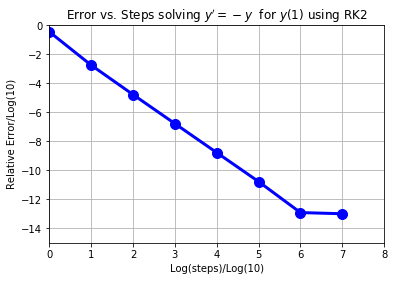

In [30]:
plt.plot(np.log(steps)/np.log(10),np.log(rel_error)/np.log(10), color='blue', marker='o', linestyle='solid', linewidth=3, markersize=10) 

plt.axis([0,8,-15,0])
plt.title("Error vs. Steps solving $y' = -y$  for $y(1)$ using RK2")
plt.xlabel("Log(steps)/Log(10)")
plt.ylabel("Relative Error/Log(10)")
plt.grid(True)
# plt.savefig("figure.png") #save the plot to a file
plt.show()

* Initially, decreasing stepsize by an order of magnitude decreases 

* Slope $\approx -2 \implies$ second order global truncation error

* Error plateau indicates roundoff error becoming significant

# START HERE THURSDAY 1/30/20

## Section 7.2 - Error Analysis for Time-Stepping Routines

### Explicit methods vs. Implicit methods

Earlier in this notebook we considered solving a first order system of ODs  
$$\frac{d \boldsymbol{y}}{dt} = f(\boldsymbol{y}, t)$$

using Euler's method $$y_{n+1} = y_n + h f(t_n, y_n)$$

In our implementation of and experimentation with this method, we have noted a few relevant properties:

1) Like all discretization methods, this method converts the given __differential equation__ (with a __continuously valued independent variable__) to a __difference equation__ (where the independent variable is replaced by an index value that takes on __discrete values__) The equation for computing the dependent value(s) $\boldsymbol{y}_{n+1}$ at the next discrete value of the idependent variable $t_{n+1}$ is often referred to as an __iteration formula__.

2) This is an __explicit method__ because the iteration formula specifies $\boldsymbol{y}_{n+1}$ as an explicit function of values at $t_n$; i.e. $\boldsymbol{y}_{n+1}$ is isolated on the left side of the formula and does not appear on the right side of the formula. Using more specific language, this is the __explicit Euler method__ or __forward Euler method__.

3) The explicit Euler method exhibits $1^{st}$-order global truncation error (associated with $2^{nd}$-order local truncation error).

4) The explicit Euler method can exhibit __instability__ if the stepsize is allowed to become too large (in relation to the rates of change)

5) The explicit Euler method was obtained using a $2^{nd}$-order forward difference to estimate the derivative at the beginning (left edge) of the step.

Now let's consider an alternative approach and estimate the derivative at the end (right edge) of the step using the corresponding __backward difference__ estimate:

Instead of $y'(t_n) = \frac{1}{h} (y_{n+1}-y_n)$, use $y'(t_{n+1}) = \frac{1}{h} (y_{n+1}-y_n)$ to obtain:
$$y_{n+1} = y_n + h f(t_n, y_{n+1})$$

This iteration formula specifies $y_{n+1}$ __implicitly__ (because $y_{n+1}$ no longer appears as an isolated term, but appears in multiple terms in the iteration formula). This is called the __implicit Euler method__ or __backward Euler method__.

In general, this would involve using a solver or rootfinding technique at each step (which would be expensive and, therefore, undesirable). Before coming back to a general fix to address this issue, let's return to our example problem: $$y' = f(y,t) = \lambda y \; ; \; y(0)=y_0$$ 

Due to the simple form of the rate specification, $f(u,t) =  - \lambda y$, we can obtain an explicit iteration formula describing the approximate solution obtained using the implicit Euler method:
$$y_{n+1} = y_n + h f(t_n, y_{n+1}) = y_n + h \lambda y_{n+1} \implies (1-\lambda h) y_{n+1} = y_n$$
or $$y_{n+1} = \frac{1}{1-\lambda h} y_n$$
We can solve this difference equation to obtain the implicit euler solution: $$y_N = y_0 \big( \frac{1}{1-\lambda h} \big)^N$$
Compare this with the explicit Euler method: 
$$y_{n+1} = (1+\lambda h) y_n \implies y_N = y_0 (1+\lambda h)^N$$

In each case, we obtain a solution as a geometric sequence. Each iterate is a multiple of the previous iterate, so the solutions of the difference equations exhibit growth or decay depending on the magnitude of the multiplicative factor. 

The solution (and the error in the solution) decays when the factor has magnitude $<1$.

The solution (and the error in the solution) grows implying __instability__ when the factor has magnitude $>1$.

So let's obtain a __stability criterion__ for each method (corresponding to the multiplier having magnitude $<1$). For larger systems, the multiplier arises as an eigenvalue (which can be complex), so the common notation is to write $$\lambda h =z$$ and to think of $z$ as a complex variable (even though, in this simple case, we will be interested in what happens along the real axis).

- The stability criterion for the explicit Euler method, where the multiplicative factor is $(1+z)$, is:
$$\big| 1+z \big| < 1$$

- The stability criterion for the implicit Euler method, where the multiplicative factor is $(1-z)^{-1}$, is:
$$\big| \frac{1}{1-z} \big| < 1$$

Let's plot the stable regions:

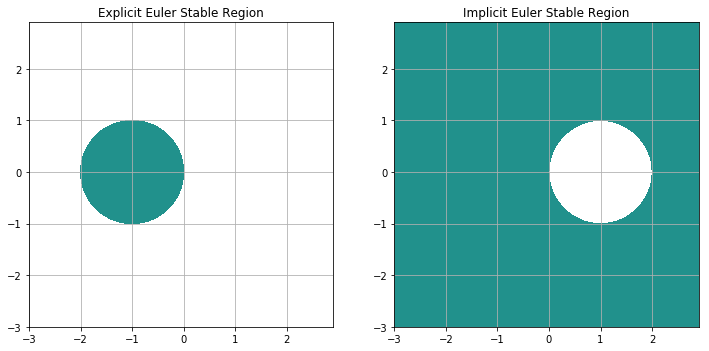

In [364]:
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

X, Y = np.meshgrid(x, y)

Z1 = np.sqrt((X+1)**2 + Y**2)
Z2 = 1./np.sqrt((X-1)**2 + Y**2)
levels = [0.,1.]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

mycmap1 = plt.get_cmap('gist_earth')
ax1.set_aspect('equal')
ax1.set_title('Explicit Euler Stable Region')
ax1.grid()
cf1 = ax1.contourf(X,Y,Z1, levels)

mycmap2 = plt.get_cmap('gnuplot2')
ax2.set_aspect('equal')
ax2.set_title('Implicit Euler Stable Region')
ax2.grid()
cf2 = ax2.contourf(X,Y,Z2, levels)

plt.show()

Now interpret the results (focusing on the real axis):

Explicit Euler is stable when $-2 < \lambda h < 0$, so for the interesting case when $\lambda <0$ (when the solution itself is stable), a stable Explicit Euler solution requires $$h < \frac{2}{\lambda}.$$

Implicit Euler is stable except when $0 < \lambda h < 2$, so for the interesting case when $\lambda <0$ (when the solution itself is stable), a stable Implicit Euler numerical solution is obtained for all stepsizes.$$

As an example, let's return to the sample problem $y' =  -25y$ (where $\lambda = 25$).

We saw that the explict Euler solution was stable for $h = 0.02$ and unstable for $h =  0.1$. We can now pinpoint the cutoff point between stable and unstable solutions should occur at $h = \frac{2}{25} = 0.08$.

In sharp contrast, the implicit Euler method continues to be stable for large stepsize (although with gradual loss of accuracy).

The enhanced stability makes the implicit approach seem attractive, but remember that there is an associated cost: in general, an implicit approach would require using rootfinding to compute the new dependent value that satisfies the iteration formula. It is only is very simple cases where an implicit method leads to an iteration formula that can be converted to explicit form.

This has led to a middle ground approach:

- Use an explicit method to compute a __predicted__ value for $y_{n+1}$

- Then use an implicit method, plugging the predicted value in the rate equation, to compute a __corrected__ value for $y_{n+1}$.

Such an approach is called a __predictor-corrector__ method. More specifically, the scheme above is a __predict-evaluate-correct (PEC)__ approach.

Solving an ODE involves estimating a solution based on a given rate of change. and the predictor-corrector approach can be thought of as an attempt to carry forward information about how the value is changing. (Note that Runge-Kutta methods compute a new value and then immediately ignore all the old values.) In that context, it is natural to consider predictor-corrector schemes based on __multi-step methods__ such as the Adams method that was mentioned above, but not yet implemented:

$$y_{n+1}=y_n + \frac{h}{2} \big[ 3 f(t_n,y_n) - f(t_{n-1},y_{n-1}) \big]; \qquad \mathrm{Eq.(7.1.23)}$$

Recall that this formula was obtained by constructing a degree $n$ interpolant based on the current value and values from the $n$ previous steps. In this particular case, $n=1$ and this is called the __second order Adams-Bashforth method__, and it provides an __explicit__ formula for computing $y_{n+1}$.

In very much the same way, we could construct the interpolant based on values at the current step, the next step, and $n-1$ previous steps. This leads to an __implicit__ formula called the __Adams-Moulton method__. The second order Adams-Moulton formula is:
$$y_{n+1}=y_n + \frac{h}{2} \big[ f(t_{n+1},y_{n+1}) + f(t_n,y_n)  \big]$$

Instead of rootfinding to solve for $y_{n+1}$ in the Adams-Moulton formula, pair it with the corresponding Adams-Bashforth method:

- Use the explicit Adams-Bashforth method to compute a predicted value $y^P_{n+1}$

- Plug the prediction into the right-hand side of the implicit Adams-Moulton formula

\begin{equation}
\begin{aligned}
y^P_{n+1}&=y_n + \frac{h}{2} \big[ 3 f(t_n,y_n) - f(t_{n-1},y_{n-1}) \big]; \qquad \mathrm{Eq.(7.1.29)} \\
y_{n+1}&=y_n + \frac{h}{2} \big[ \; f(t_{n+1},y^P_{n+1}) + f(t_n,y_n)  \big]
\end{aligned}
\end{equation}

Together the equations provide a way to employ an implicit method without the expense of solving nonlinear equations.

## Section 7.3 - Advanced Time-Stepping Algorithms

Please read this section on your own.

## Section 7.4 - Boundary Value Problems: <br>The Shooting Method

So far, we have dealt with __initial value problems (IVPs)__ where the given values are at some initial "time" and we can step forward from there to wherever the solution takes us. Now we consider __boundary value problems (BVPs)__ where conditions are specified at the endpoints of an interval. For example, a typical second order boundary value problem has the form:
$$\frac{d^2 y}{dt^2} = f \big(t, y, \frac{dy}{dt} \big)$$
with boundary conditions
\begin{equation} \label{eq1}
\begin{split}
\alpha_1 y(a) + \beta_1 \frac{dy(a)}{dt} & = \gamma_1 \\
\alpha_2 y(b) + \beta_2 \frac{dy(b)}{dt} & = \gamma_2
\end{split}
\end{equation}

### The shooting method

One approach to such a problem is a shooting method:

- Satisfy the condition at one end of the interval and guess the other condition that should be satisfied there.

- Apply one of the stepping methods we have developed to get a numerical solution at the other end of the interval.

- Based on the "residual" (how far the solution is from satisfying the second condition), adjust the guess.

- Repeat until tolerance is satisfied.

To be more concrete, consider the basic case where the boundary conditions are $$y(a) = \alpha ; y(b) = \beta$$.

(This notation is not exactly self-consistent, but it consistent with the text.)

As usual, we convert the second order ODE to a first order system in term of the vector $$\boldsymbol{y} = (y, \frac{dy}{dt})^T = (y_0, y_1)^T$$

So we have an initial value of `y[0]`$=y$ at $t=a$, and we have to determine the initial value of the velocity `y[1]` at $t=a$: $$\frac{dy(a)}{dt} = A$$.

After some initial exploring to find values $A_1$ that produces a value $y(b)<\beta$ and $A_2$ that produces a value $y(b)>\beta$, than applying a bisection rootfinding method can be applied to find $A^*$ that leads to $|y(b)-\beta| <$ tolerance. See pp. 154-157 for a detailed example.

### Eigenvalues and eigenfunctions <br>(and the infinite domain)

Boundary value problems often arise as eigenproblems where both the eigenvalue and eigenfunction must be determined. For example:
$$\frac{d^2\psi_n}{dx^2} + [n(x)-\beta_n]\psi_n = 0$$
with boundary conditions $$\psi_n(x) \rightarrow 0 \; \mathrm{as} \; x\rightarrow \pm \infty$$

This is essentially the Shrodinger equation with potential well $n(x)$. While the domain here is infinite, our stepping methods require that we compute on a finite domain, so we will consider $x\in [-L,L]$ for some finite value of $L$. The example in the book considers $n(x)$ with __finite support__ ("support" is the region where the function can have non-zero values):
$$n(x) = n_0 (1-|x|^2)\; \mathrm{on} \; -1 \leq x \leq 1 ; \qquad n(x)=0 \; \mathrm{elsewhere}$$

Beyond the support region the ODE simplifies to: $$\frac{d^2\psi_n}{dx^2} - \beta_n\psi_n = 0$$
which we can solve analytically: $$\psi_n = c_1 \mathrm{exp}\big(\sqrt{\beta_n} x \big) + c_2 \mathrm{exp}\big(-\sqrt{\beta_n} x \big)$$
Applying the BCs $\psi_n \rightarrow 0$ as $x\rightarrow \pm \infty$, we get left side and right side solutions:
$$\psi_n = c_2 \mathrm{exp}\big(-\sqrt{\beta_n} x \big), \qquad x>1$$ 
$$\psi_n = c_1 \mathrm{exp}\big(\sqrt{\beta_n} x \big), \qquad x<-1$$

From there, we can obtain conditions at $x= \pm 1$:
$$\frac{d \psi_n(1)}{dx} = -\sqrt{\beta_n} \psi_n(1)$$
$$\frac{d \psi_n(-1)}{dx} = \sqrt{\beta_n} \psi_n(-1)$$

Now we convert to a first order system to arrive at the boundary value problem:
\begin{equation} \label{eq1}
\begin{split}
y_0' &= \psi_n' & = y_1 \\
y_1' &= \psi_n'' & = [\beta_n-n(x)] y_0
\end{split}
\end{equation}

with BCs: 
\begin{equation} \label{eq1}
\begin{split}
x=1 &: y_1 & = -\sqrt{\beta_n} y_0 \\
x=-1 &:  y_1 & = \sqrt{\beta_n} y_0
\end{split}
\end{equation}

And this can be solved using a shooting method where we search for the eigenvalue that appears in the boundary conditions.

## Section 7.5 - Implementation of Shooting and Convergence Studies

More details about this are in the works...

## Section 7.6 - Boundary Value Problems: <br>Direct Solve and Relaxation

This section considers an alternative approach:

- Make the values of $y$ at every step variables

- Discretize the ODE to get relationships between nearby $y$ values

- Construct a LARGE system of algebraic equations

- Solve the algebraic system

When is this tractable? If your ODE is linear, you can apply your linear solver knowledge...